cd /scratch/groups/mrivas/szainana/

In [2]:
!pip uninstall umr-visualizer -y


Found existing installation: umr-visualizer 0.1.2
Uninstalling umr-visualizer-0.1.2:
  Successfully uninstalled umr-visualizer-0.1.2


In [3]:
! pip list | grep umr-visualizer

In [4]:
! pip install -e /Users/salmazainana/umr-visualizer
! pip install --upgrade nbformat



Obtaining file:///Users/salmazainana/umr-visualizer
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of umr-visualizer==0.1.2 from file:///Users/salmazainana/umr-visualizer (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for umr-visualizer


In [5]:
# Check if package installed
! pip list | grep umr-visualizer

umr-visualizer            0.1.2       /Users/salmazainana/umr-visualizer


In [6]:
# # Even if the package is installed, sometimes Jupyter doesn’t recognize it. To fix this:
import sys
print(sys.executable)
sys.path.append("/Users/salmazainana/umr-visualizer")


/opt/anaconda3/envs/umr-visualizer/bin/python


In [7]:
import umr_visualizer as uv
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


# The dataset on the APOB gene (LDL description)

### Load data set 

In [17]:
file_path = "/Users/salmazainana/Documents/Rivas/Dataset/filtered_APOB_data.tsv"
correct_columns = [
    "locus", "alleles", "markerID", "gene", "annotation", "call_stats", "n_cases",
    "n_controls", "heritability", "saige_version", "inv_normalized", "trait_type",
    "phenocode", "pheno_sex", "coding", "modifier", "n_cases_defined", 
    "n_cases_both_sexes", "n_cases_females", "n_cases_males", "description", 
    "description_more", "coding_description", "category", "AC", "AF", "BETA", 
    "SE", "AF.Cases", "AF.Controls", "Pvalue", "chr", "pos", "ref", "alt", 
    "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"
]

df = pd.read_csv(file_path, sep="\t", skiprows=1, names=correct_columns)
df.head()




,locus,alleles,markerID,gene,annotation,call_stats,n_cases,n_controls,heritability,saige_version,...,AF.Controls,Pvalue,chr,pos,ref,alt,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,APOB,0.012711,0.96865,0.042032,0.1485,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,APOB,1.577000,0.96861,0.023355,0.0902,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,APOB,-0.548010,0.96840,0.000067,0.2574,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,APOB,1.034900,0.96867,0.000040,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APOB,-0.004753,0.14775,0.000040,0.1224,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# df = df[df["phenocode"] == 30780]

In [19]:
columns_to_keep = ["gene", "BETA", "SE", "prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]

# Keep only these columns
df_filtered = df[columns_to_keep]
df_filtered.head()

# Save the filtered DataFrame
output_file_path = "/Users/salmazainana/Documents/Rivas/Dataset/filtered_APOB_data_2.tsv"
df_filtered.to_csv(output_file_path, sep="\t", index=False)
df = pd.read_csv(output_file_path, sep="\t")
df.head()



,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,0.042032,NaN,NaN,NaN,NaN,NaN,NaN
1,0.023355,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000067,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000040,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000040,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#print number of examples
print(f"Number of examples: {df.shape[0]}")

Number of examples: 1067213


In [11]:
print(df.nunique())

gene                       1
BETA                  326120
SE                    103251
prob_0                  2775
am_pathogenicity        1529
pLoF_indicator             2
missense_indicator         2
dtype: int64


In [ ]:

# Check if there are NaNs in any columns 
df.isnull().sum()



In [13]:
# # fill the Nan Values with average of the column for prob_0 and am+pathogenicity
# df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
# df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())
# df.isnull().sum()

# Drop rows with NaN values
# df = df.dropna()
# df.isnull().sum()


# We can't drop them because we will lose a the variety in the two last columns 
# instead we can fill them with the mean of the column
df["prob_0"] = df["prob_0"].fillna(df["prob_0"].mean())
df["am_pathogenicity"] = df["am_pathogenicity"].fillna(df["am_pathogenicity"].mean())



In [14]:
df.isnull().sum()

gene                  0
BETA                  0
SE                    0
prob_0                0
am_pathogenicity      0
pLoF_indicator        0
missense_indicator    0
dtype: int64

In [15]:
print(f"Number of examples: {df.shape[0]}")

Number of examples: 1067213


In [16]:
print(df.nunique()) # to make sure no constant columns

gene                       1
BETA                  326120
SE                    103251
prob_0                  2776
am_pathogenicity        1530
pLoF_indicator             2
missense_indicator         2
dtype: int64


### Preprocessing 

In [17]:
df.head()

,gene,BETA,SE,prob_0,am_pathogenicity,pLoF_indicator,missense_indicator
0,APOB,0.012711,0.96865,0.042032,0.148500,0,1
1,APOB,1.577000,0.96861,0.023355,0.090200,0,1
2,APOB,-0.548010,0.96840,0.000067,0.257400,0,1
3,APOB,1.034900,0.96867,0.000040,0.195181,0,0
4,APOB,-0.004753,0.14775,0.000040,0.122400,0,1


In [18]:
print("SE min:", np.min(df["SE"]))
print("SE max:", np.max(df["SE"]))

SE min: 0.0
SE max: 7758.7


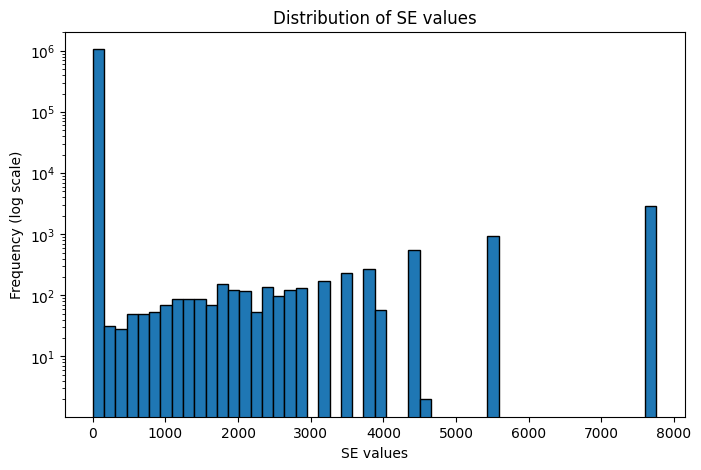

In [19]:
# Assuming SE values are stored in a variable called se_values
se_values = df["SE"].values

# Plot histogram of SE values
plt.figure(figsize=(8, 5))
plt.hist(se_values, bins=50, edgecolor="black", log=True)  # Log scale for better visibility
plt.xlabel("SE values")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of SE values")
plt.show()

In [20]:
# Compute IQR
Q1 = np.percentile(se_values, 25)
Q3 = np.percentile(se_values, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where SE is outside the bounds
valid_indices = (se_values >= lower_bound) & (se_values <= upper_bound)
df_filtered = df[valid_indices]


In [21]:
print("SE min:", np.min(df_filtered["SE"]))
print("SE max:", np.max(df_filtered["SE"]))

SE min: 0.0
SE max: 1.7498


In [22]:
print(f"Number of examples: {df_filtered.shape[0]}")

Number of examples: 1052887


In [23]:
# Clip very small SE values to avoid extreme w values
SE_min_threshold = 1e-2  # Adjust as needed
df_filtered = df_filtered[df_filtered["SE"] >= SE_min_threshold]
print("SE min:", np.min(df_filtered["SE"]))
print("SE max:", np.max(df_filtered["SE"]))
print(f"Number of examples: {df_filtered.shape[0]}")

SE min: 0.010003
SE max: 1.7498
Number of examples: 1049198


In [24]:
X_full = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]].values
y = df_filtered['BETA'].values
w = 1 / (df_filtered['SE'].values ** 2)


In [25]:
print("w contains NaN:", np.isnan(w).any())
print("w contains Inf:", np.isinf(w).any())
print("w min:", np.min(w))
print("w max:", np.max(w))
print("the shape of w is:", w.shape)

w contains NaN: False
w contains Inf: False
w min: 0.3266052606100299
w max: 9994.002698920405
the shape of w is: (1049198,)


In [26]:
# Print the shape of matrix X_full
print("Shape of X_full:", X_full.shape)

Shape of X_full: (1049198, 4)


In [27]:
X_w = X_full.T * w
tmp = X_w @ X_full# Equivalent to X_full.T @ np.diag(w) @ X_full

In [28]:

print("Determinant:", np.linalg.det(tmp))
print("Rank:", np.linalg.matrix_rank(tmp), "/", tmp.shape[0])

Determinant: 2.182307612322103e+23
Rank: 4 / 4


In [29]:
matrix_to_invert = np.linalg.pinv(tmp) 


In [30]:
beta_full = matrix_to_invert @ (X_w @ y)


In [31]:

fitted_values_full = np.dot(X_full, beta_full)


In [32]:
corr_matrix = pd.DataFrame(X_full).corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          0         1         2         3
0  1.000000 -0.004740  0.018263  0.005628
1 -0.004740  1.000000  0.000118 -0.000395
2  0.018263  0.000118  1.000000 -0.298417
3  0.005628 -0.000395 -0.298417  1.000000


The highest absolute correlation is -0.2984, which is still moderate at best.

In [33]:
# Does X_full contain any NaN values?
print("X_full contains NaN:", np.isnan(X_full).any())

X_full contains NaN: False


In [34]:
print(pd.DataFrame(X_full).nunique())

0    2776
1    1530
2       2
3       2
dtype: int64


## Plotting of filtered data

In [35]:
%matplotlib inline


Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.241823           0.000021
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.473308           0.000042
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.410139           0.000036
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.470665           0.000042
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.47330846323472037), 'pLoF_indicator': np.fl

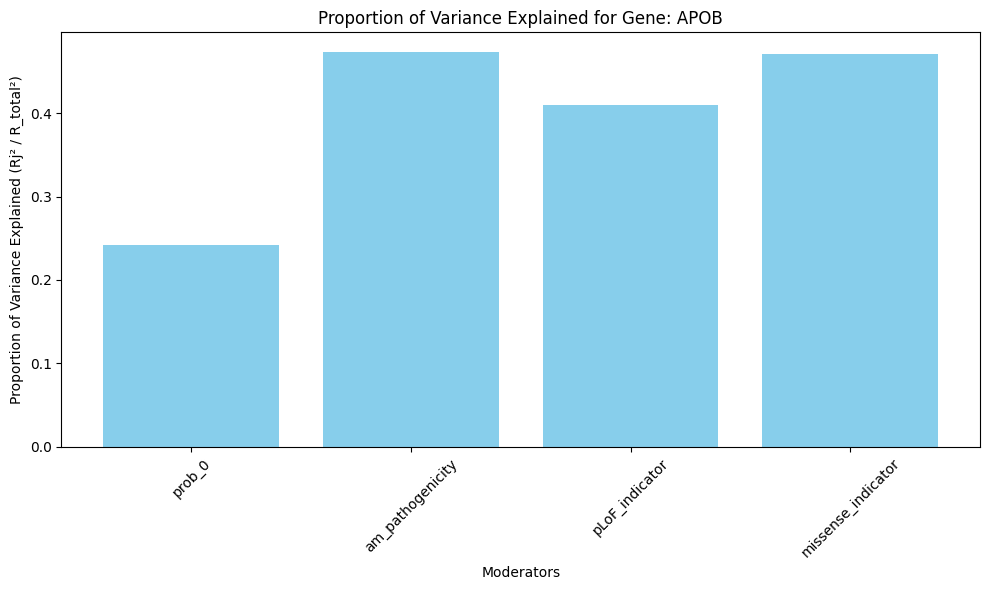

In [36]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="matplotlib", gene_filter=["APOB"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.241823           0.000021
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.473308           0.000042
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.410139           0.000036
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.470665           0.000042
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.47330846323472037), 'pLoF_indicator': np.fl

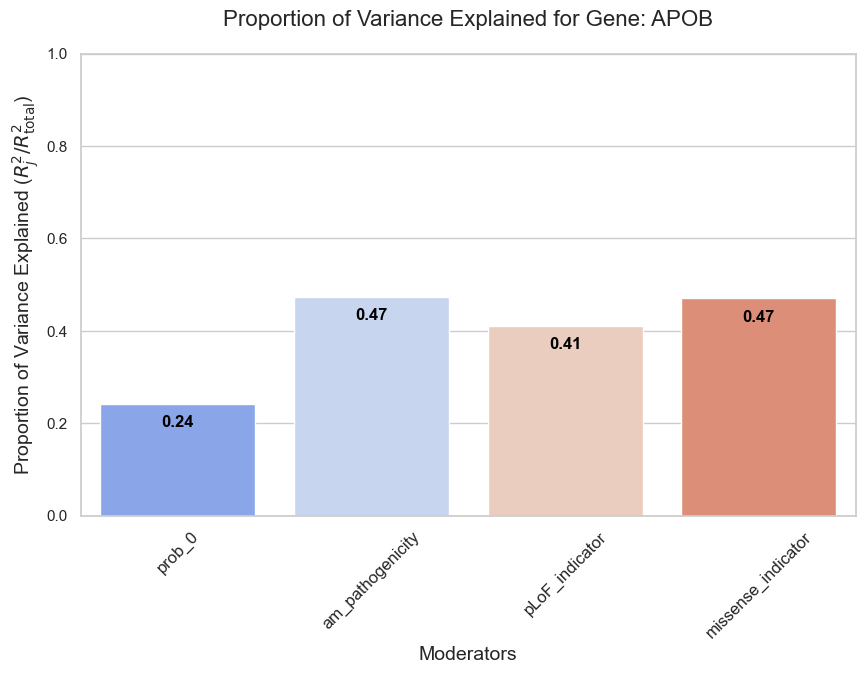

In [37]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="seaborn", gene_filter=["APOB"])

If the variance explained by each moderator separately is high, but the full model’s R^2 is low, then:
- The moderators might be explaining the same variance, so they don’t add up in the full model.
- The variance explained per moderator is overestimated due to shared variance with other factors.

Variance Inflation Factor (VIF) is a measure of multicollinearity among the independent variables in a regression model.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature       VIF
0              prob_0  1.039968
1    am_pathogenicity  1.870392
2      pLoF_indicator  1.052101
3  missense_indicator  1.831525


Since all VIF values are below 5, predictors are not highly correlated, meaning they are relatively independent./

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.241823           0.000021
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.473308           0.000042
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.410139           0.000036
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.470665           0.000042
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.47330846323472037), 'pLoF_indicator': np.fl

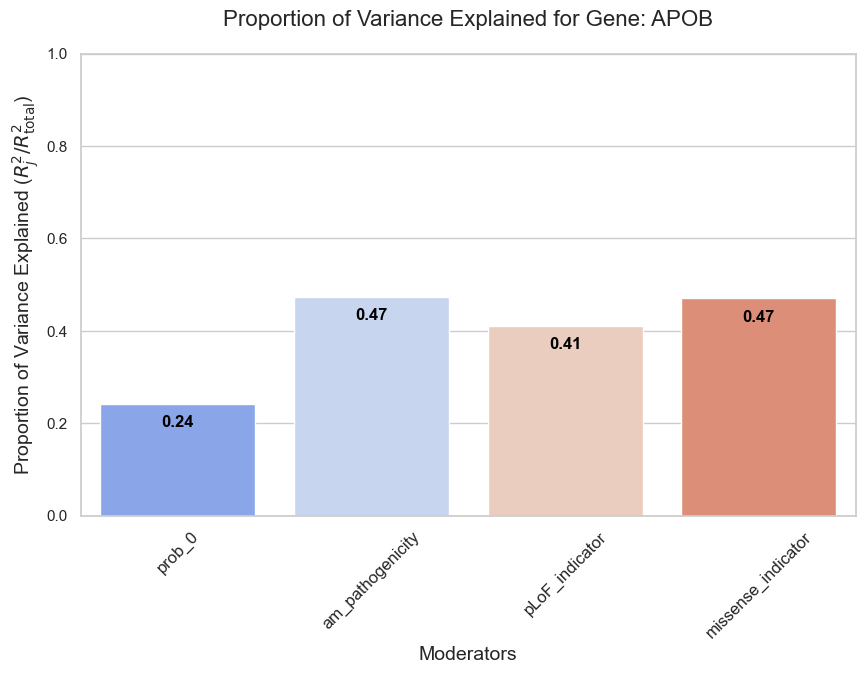

In [39]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="seaborn", gene_filter=["APOB"])

In [40]:
uv.plot_proportion_variance_explained(df_filtered, fitted_values_full, style="plotly", gene_filter=["APOB"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Computing variance explained for moderator: prob_0
Computing variance explained for moderator: am_pathogenicity
Computing variance explained for moderator: pLoF_indicator
Computing variance explained for moderator: missense_indicator
Generating plot for gene: APOB
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.241823           0.000021
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.473308           0.000042
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.410139           0.000036
   gene  Proportion_Variance_Explained  R_squared_reduced
0  APOB                       0.470665           0.000042
Variance data for gene APOB: {'prob_0': np.float64(0.2418231671907962), 'am_pathogenicity': np.float64(0.47330846323472037), 'pLoF_indicator': np.fl

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}


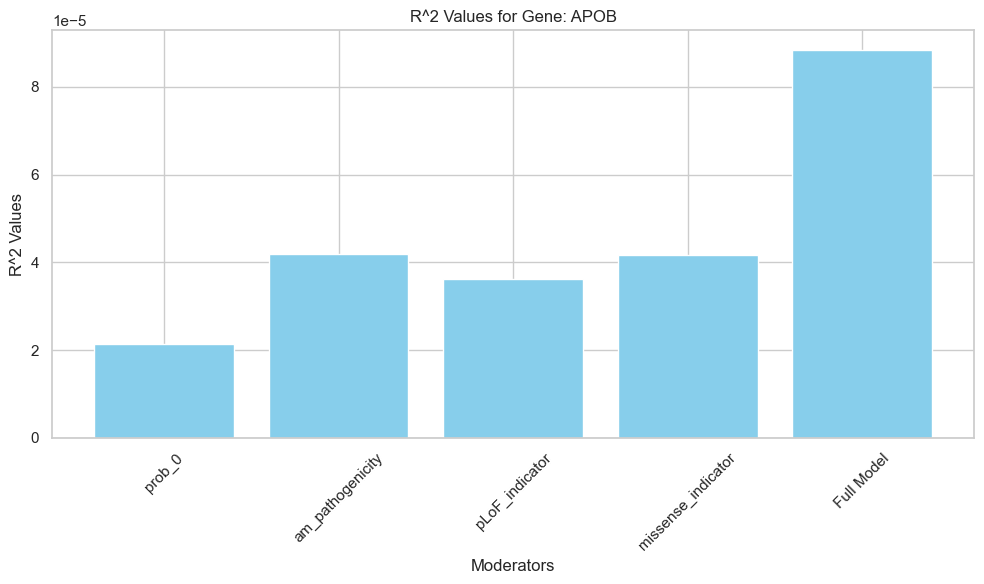

In [41]:
uv.plot_r2(df_filtered, fitted_values_full, style="matplotlib", gene_filter=["APOB"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}


/Users/salmazainana/umr-visualizer/umr_visualizer/plots.py:178: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




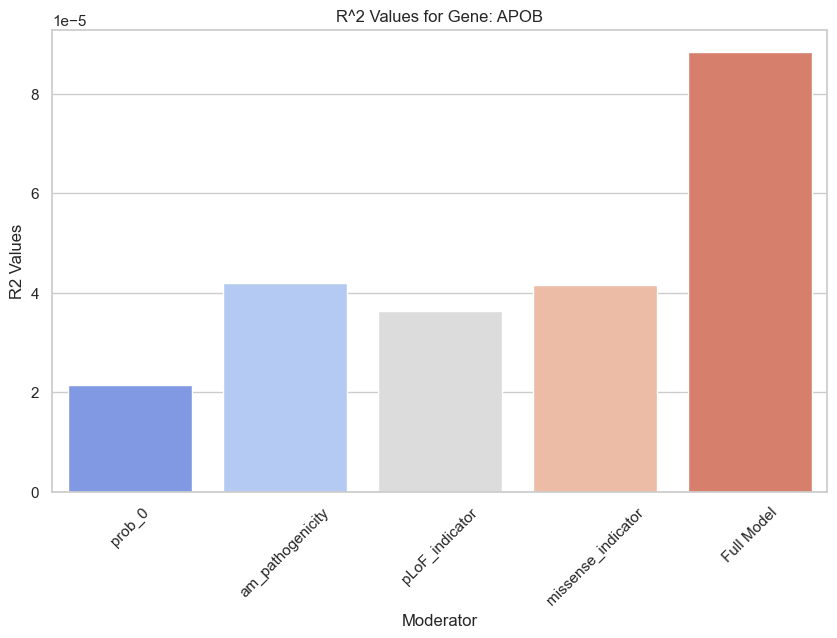

In [42]:
uv.plot_r2(df_filtered, fitted_values_full, style="seaborn", gene_filter=["APOB"])

In [43]:
uv.plot_r2(df_filtered, fitted_values_full, style="plotly", gene_filter=["APOB"])

Moderators identified: ['prob_0', 'am_pathogenicity', 'pLoF_indicator', 'missense_indicator']
Unique genes found: ['APOB']
Processing full model R² for gene: APOB
For gene APOB : SSR Full= 1103241.0900303237, SST= 1103338.7102968858
Computed Full Model R² values: {'APOB': np.float64(8.8477151803934e-05)}


EditThe very small R² values you're seeing (around 0.00008 for the full model) indicate that your model is explaining an extremely tiny fraction of the variance in the Beta values, despite the gene being statistically significant.
This situation is actually not uncommon in genetics studies and meta-regression models for several reasons:

Statistical significance vs. effect size: P-values measure statistical significance, which can be very strong even when the amount of variance explained is small, especially with large sample sizes.
Rare variant context: In rare variant association studies, individual variants often have small effects, resulting in low R² values even when the association is statistically robust.
Weight structure: The 1/SE² weighting means that variants with small standard errors have outsized influence on the model. This can lead to statistically significant results with small R² values.
Proportion of variance explained vs. absolute R²: Notice that while your full model R² is tiny (0.00008), the proportion of variance explained by each moderator is substantial (e.g., am_pathogenicity explains about 47% of that small amount of explained variance).

To better understand what's happening:

Check variant counts: How many variants are you including for this gene? A small number could influence the reliability of R² calculations.
Examine the distribution of Beta values: Are most Beta values clustered tightly? This could make the total variance small.
Look at moderator distributions: Are your moderators well-distributed or are they heavily skewed?
Consider transformations: Log transformations on some variables might improve the model fit.
Examine model residuals: Plot residuals to check for patterns suggesting model misspecification.

In [46]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.6 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [ ]:
# test 
# This do not work because y_bar_w = sum (y)/n 
# from sklearn.metrics import r2_score
# r_squared_full = r2_score(df_filtered['BETA'], fitted_values_full, sample_weight=1 / (df_filtered['SE'] ** 2))  
# r_squared_full

In [66]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Full model (with all moderators)
X_full = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]]
wls_full = sm.WLS(df_filtered['BETA'], X_full, weights=1 / (df_filtered['SE'] ** 2)).fit()
print(f"Full Model R² : {wls_full.rsquared}")
# Reduced models
for mod in ["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]:
    X_full = df_filtered[["prob_0", "am_pathogenicity", "pLoF_indicator", "missense_indicator"]]
    X_reduced = X_full.drop(columns=mod)  
    wls_reduced = sm.WLS(df_filtered['BETA'], X_reduced, weights=1/(df_filtered['SE'] ** 2)).fit()

    # Compute R² for reduced models
    r_squared_reduced = wls_reduced.rsquared
    print(f"Reduced Model R² (without {mod}): {r_squared_reduced}")
print("la somme est ", somme)


Full Model R² : 0.0001128681873381332
Reduced Model R² (without prob_0): 9.147431943179463e-05
Reduced Model R² (without am_pathogenicity): 7.099417560885168e-05
Reduced Model R² (without pLoF_indicator): 7.658299724322415e-05
Reduced Model R² (without missense_indicator): 7.122806126014236e-05
la somme est  0.0003102795535440128


In [ ]:
# Test functions + Do same for gene KCNK6 phenotype 30680 expect Rj piss < Rj prob0